<iframe
  style="width: 100%; aspect-ratio: 16 / 9;"
  src="https://www.youtube.com/embed/l7_-HHvvc7o"
  title="YouTube video player"
  frameborder="0"
  allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share"
  allowfullscreen>
</iframe>

# Subplots in Matplotlib

Traditionally, Matplotlib's `pyplot` functions are used for creating single plots. However, for visualizing complex data or comparing datasets, it’s often helpful to create multiple plots within the same figure. Subplots are a powerful feature in Matplotlib that allow you to arrange multiple plots within a single figure. 

## Setting Up with Subplots

To get started, let’s import the necessary libraries and set up our data.

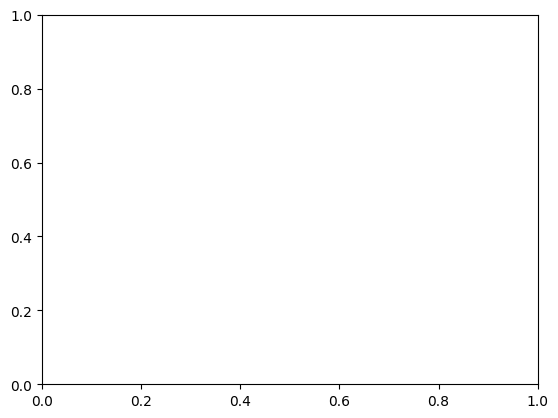

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Load sample data using pandas
data = {
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Temperature': [30, 32, 35, 31, 30, 29, 33, 34, 36, 32],
    'Humidity': [70, 65, 60, 75, 80, 78, 72, 68, 64, 66]
}
df = pd.DataFrame(data)

# Explanation of figure and axes objects
fig, ax = plt.subplots()  # Default 1x1 configuration

***Explanation:***

* **Figure and Axes**: `fig` is the entire figure object, and `ax` (or `axes`) represents the individual plot area within the figure.
* **Using `plt.subplots()`**: Calling `plt.subplots()` without any arguments creates a single 1x1 subplot configuration, ideal for cases where you need one plot but prefer using the object-oriented interface.


## Plotting with a Single Axis

Instead of using `plt.plot()`, we can use the `ax` object to plot data. This method is recommended when you want better control over individual plots.

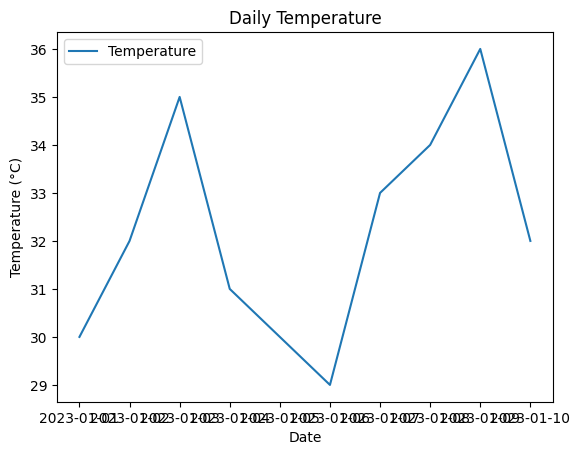

In [2]:
fig, ax = plt.subplots()  # Initialize figure and axes
ax.plot(df['Date'], df['Temperature'], label='Temperature')  # Plot data using ax object

# Set axis labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Daily Temperature")
ax.legend()  # Use ax.legend() instead of plt.legend()

plt.show()

***Explanation:***

* **Axes Methods**: We use `ax.plot()` instead of `plt.plot()` to work directly on the specific subplot (axis). Similarly, `ax.set_xlabel()`, `ax.set_ylabel()`, `ax.set_title()`, and `ax.legend()` are used for labels, title, and legend, respectively.
* **Benefits**: Using the `ax` object makes it easy to manage multiple plots within the same figure.


## Configuring Multiple Subplots

To create multiple subplots, specify the number of rows and columns when calling `plt.subplots()`.

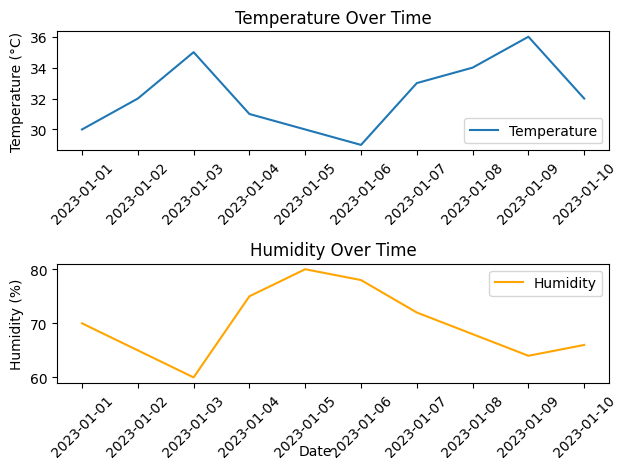

In [16]:
fig, axes = plt.subplots(2, 1)  # Create a 2x1 grid (2 rows, 1 column)

# Plot on each subplot individually
axes[0].plot(df['Date'], df['Temperature'], label='Temperature')
axes[0].set_title("Temperature Over Time")
axes[0].set_ylabel("Temperature (°C)")
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(df['Date'], df['Humidity'], label='Humidity', color='orange')
axes[1].set_title("Humidity Over Time")
axes[1].set_ylabel("Humidity (%)")
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Set common x-axis label for both subplots
fig.text(0.5, 0.04, "Date", ha='center')

plt.tight_layout()
plt.show()

***Explanation:***

* **Multiple Subplots**: `plt.subplots(2, 1)` creates a 2x1 grid of subplots (two rows, one column).
* **Axes Array**: `axes` is an array (or nested list) where each element represents an individual subplot, allowing you to customize each one separately.
* **Unpacking**: `axes[0]` and `axes[1]` represent individual subplots. This setup is essential when dealing with multiple plots.


## Sharing Axes and Labels Across Subplots

When working with multiple subplots, you can share the x-axis or y-axis to avoid redundant labels and create a cleaner look.

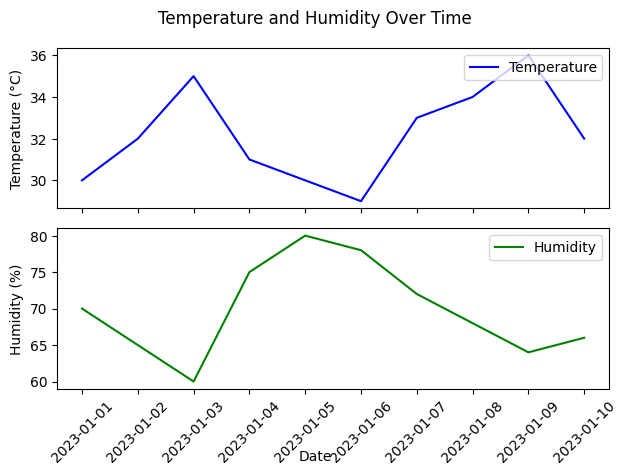

In [14]:
fig, axes = plt.subplots(2, 1, sharex=True)  # Share the x-axis between subplots

# Plot data
axes[0].plot(df['Date'], df['Temperature'], label='Temperature', color='blue')
axes[0].set_ylabel("Temperature (°C)")
axes[0].legend(loc='upper right')

axes[1].plot(df['Date'], df['Humidity'], label='Humidity', color='green')
axes[1].set_ylabel("Humidity (%)")
axes[1].legend(loc='upper right')
axes[1].tick_params(axis='x', rotation=45)

# Set x-axis label only once since it's shared
fig.suptitle("Temperature and Humidity Over Time")  # Common title for the figure

plt.tight_layout()
plt.show()

***Explanation:***

* **Share Axes**: The `sharex=True` parameter shares the x-axis, so dates appear only on the bottom subplot.
* **Single X-Axis Label**: Using `fig.text()` to set a single x-axis label avoids repetition.
* **Common Title**: `fig.suptitle()` adds a title for the entire figure, helpful for grouped plots.


## Creating Separate Figures

In cases where you want to separate visualizations into different figures, you can create multiple `figure` objects using `plt.figure()`.

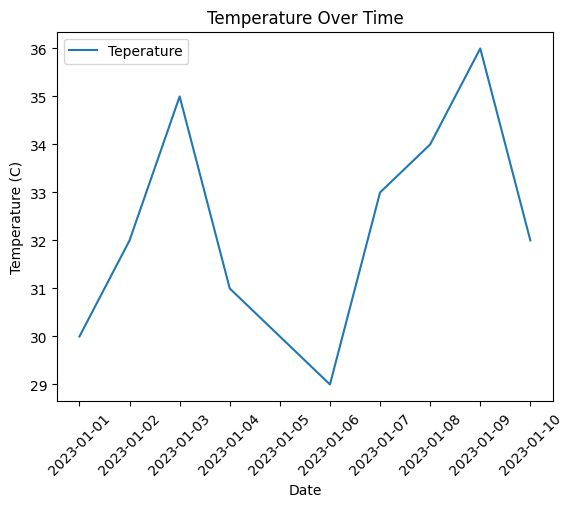

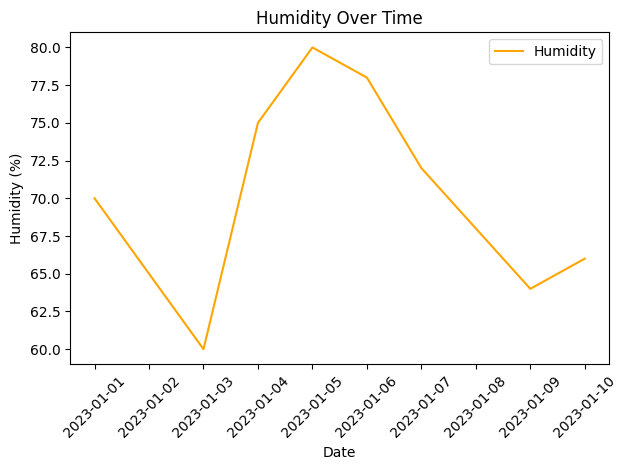

In [19]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.plot(df['Date'], df['Temperature'], label='Teperature')
ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (C)")
ax1.set_title("Temperature Over Time")
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

ax2.plot(df['Date'], df['Humidity'], label='Humidity', color='orange')
ax2.set_xlabel("Date")
ax2.set_ylabel("Humidity (%)")
ax2.set_title("Humidity Over Time")
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

***Explanation:***

* **Multiple Figures**: Each `plt.figure()` call creates a new figure. Use this when you need separate windows or want to save figures individually.
* **Independent Control**: Each figure has its own `ax` and configuration, allowing independent customization.


## Saving Multiple Figures

Saving figures is essential for reports or presentations. Each figure can be saved independently using the `figure.savefig()` method.

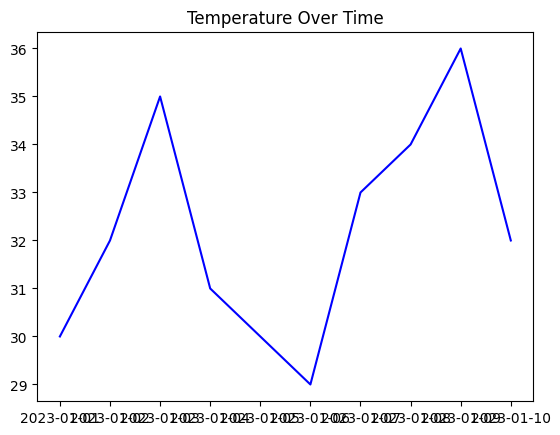

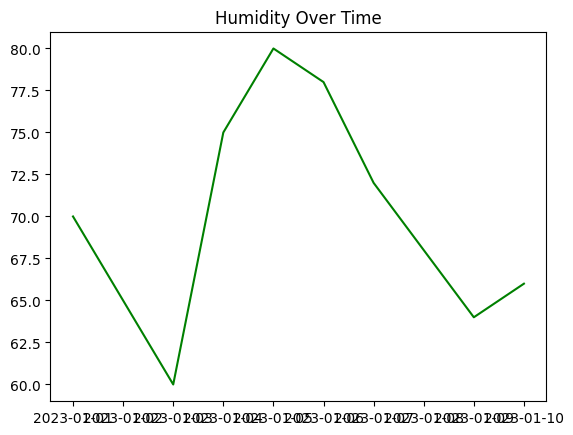

In [6]:
# Saving the first figure
fig1, ax1 = plt.subplots()
ax1.plot(df['Date'], df['Temperature'], color='blue')
ax1.set_title("Temperature Over Time")
fig1.savefig("temperature_plot.png")  # Save figure

# Saving the second figure
fig2, ax2 = plt.subplots()
ax2.plot(df['Date'], df['Humidity'], color='green')
ax2.set_title("Humidity Over Time")
fig2.savefig("humidity_plot.png")  # Save figure

plt.show()

***Explanation:***

* **figure.savefig()**: Saves the figure to a file. This is useful for automating the process of exporting visualizations, especially when analyzing complex data.
* **File Format**: You can specify formats like `.png`, `.jpg`, or `.pdf`.